<a href="https://colab.research.google.com/github/EmidioLP/Freecodecamp/blob/main/Notebooks/Machine%20Learning%20with%20Python/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook é baseado nas aulas disponibilizadas em: https://www.freecodecamp.org/portuguese/learn/machine-learning-with-python/

In [67]:
import gym

In [68]:
env = gym.make('FrozenLake-v1')

In [69]:
print(env.observation_space.n) #Número de estados
print(env.action_space.n) #Número de ações

16
4


In [78]:
env.reset() #Reset para o estado padrão

0

In [79]:
action = env.action_space.sample() #Pega um estado randômico

In [80]:
new_state, reward, done, info = env.step(action)

# Criando a tabela


In [74]:
import numpy as np
import time


STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [75]:
Q = np.zeros((STATES, ACTIONS))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Constantes

Precisamos definir algumas constantes que iremos utilizar para fazer a atualização da tabela e informar ao nosso agente quando deve parar de treinar.

In [76]:
EPISODES = 2000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

# Selecionando uma ação

Uma ação a ser realizada pelo agente pode ser selecionada utilizando-se dois métodos:


*   Pegando randômicamente uma ação válida
*   Utilizando a tabela para encontrar a melhor ação



# Atualizando os valores da tabela

In [77]:
RENDER = False
epsilon = 0.9

In [81]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    
    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state
    
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break

print(Q)
print(f"Average Reward: {sum(rewards)/len(rewards)}:")

[[2.10717680e-01 2.29972205e-02 1.86391148e-02 1.88009672e-02]
 [5.05928514e-03 1.24866807e-02 1.05195559e-03 2.85051339e-01]
 [3.20415333e-03 5.55388319e-03 7.02956556e-03 1.57430893e-01]
 [1.76715032e-03 4.11746719e-03 3.45093092e-03 1.38489924e-01]
 [3.16829119e-01 4.04274069e-03 4.79950750e-04 5.87120337e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06318993e-01 1.31735165e-04 3.48767115e-04 2.31846714e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.15042437e-02 2.46467495e-03 1.79668061e-02 4.71908122e-01]
 [6.69367977e-03 6.27897487e-01 5.66918505e-03 8.96659256e-03]
 [8.66952623e-01 4.17119312e-03 2.92979359e-03 1.52360058e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.27029222e-02 3.13283904e-02 8.53103800e-01 4.94629640e-02]
 [1.13217513e-01 9.83202725e-01 1.40262204e-01 1.76104590e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

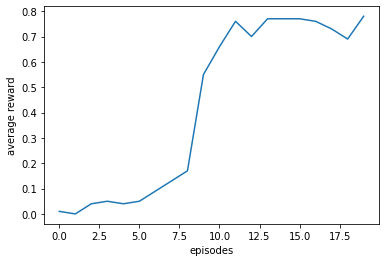

In [82]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes')
plt.show()